## **Author**: *Sena Nur Bilgin*
## **Specialization**:  *DSA*
## **Subject**: *AL Inference Steps for All Models*

### Comprehensive Evaluation of Models Across Shared and Unique Datasets and Tasks

In this study, we conducted a several evaluations of various models using both shared and distinct datasets and tasks. Our methodology encompassed:

1. **Sequential Fine-Tuning Evaluation**: Assessing how models performed when sequentially fine-tuned on the same or different datasets to enhance zero-shot learning capabilities.

2. **PEFT Lora Tuning Analysis**: Analyzing models tuned (PEFT) with Lora configurations, comparing their performance enhancements against original model settings and other models.

3. **Prompt Engineering Exploration**: Exploring the impact of prompt engineering techniques, specifically focusing on optimizing model responses with dataset-specific instructions to achieve improved task performance.

This comprehensive approach aims to provide insights into the adaptability of models across varying data inputs and the effectiveness of different tuning and engineering strategies in enhancing overall performance across diverse tasks.


### Dependencies & Importing Libraries:

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')


In [1]:
import pandas as pd
import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer, AutoModelForSeq2SeqLM, AutoTokenizer
from datasets import load_dataset
from peft import PeftModel
from Modules.utils_inference import summarize_conversations, compute_rouge_scores_for_models,plot_rouge_accuracies_and_improvements

/Users/xenanurbilgin/miniconda3/envs/AL/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Model Loads:

In [2]:
# Original models and tokenizers:
t5_original_model = T5ForConditionalGeneration.from_pretrained('t5-base')
google_t5_original_model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base", torch_dtype=torch.bfloat16)
t5_original_tokenizer = T5Tokenizer.from_pretrained('t5-base')
google_t5_original_tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base", torch_dtype=torch.bfloat16)


peft_basic_model = PeftModel.from_pretrained(google_t5_original_model, 
                                       "./Models/GOOGLE-PEFT-LoRA-BASIC", 
                                       torch_dtype=torch.bfloat16,
                                       is_trainable=False)

peft_complex_model = PeftModel.from_pretrained(google_t5_original_model, 
                                       "./Models/GOOGLE-PEFT-LoRA-COMPLEX", 
                                       torch_dtype=torch.bfloat16,
                                       is_trainable=False)


t5_2_model_path = "./Models/T52-BCN-DIALOG/checkpoint-3115"
t5_2_token_path = "./Models/T52-BCN-DIALOG"
t5_2_model = T5ForConditionalGeneration.from_pretrained(t5_2_model_path)
t5_2_tokenizer = T5Tokenizer.from_pretrained(t5_2_token_path)


# Google base T5 model and tokenizer
google_1_model_path = "./Models/GOOGLE-BCN/checkpoint-2225"
google_1_token_path = "./Models/GOOGLE-BCN"
google_1_model = T5ForConditionalGeneration.from_pretrained(google_1_model_path)
google_1_tokenizer = google_t5_original_tokenizer


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/Users/xenanurbilgin/miniconda3/envs/AL/lib/python3.9/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


'NoneType' object has no attribute 'cadam32bit_grad_fp32'


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


### Data Loads:

In [3]:

# Fine-tuning group 1: News Text Summarization
dataset_bbc = load_dataset('gopalkalpande/bbc-news-summary', split='train')  # BBC News dataset
dataset_bbc_train_test = dataset_bbc.train_test_split(test_size=0.2, shuffle=True)

# Fine-tuning group 2: Dialogs Text Summarization
dataset_dialog = load_dataset("knkarthick/dialogsum")  # DialogSum dataset

# Inference Datasets:
ds_text_extraction= load_dataset("fka/awesome-chatgpt-prompts")
dataset_cnn = load_dataset("abisee/cnn_dailymail", '3.0.0')  # CNN/Daily Mail dataset
inference_edinburg_sum = load_dataset("EdinburghNLP/xsum")  # XSum dataset for inference

# Fine-tuning group 3: Sentiment Classification
inference_emotion_google = load_dataset("google-research-datasets/poem_sentiment")  # Google Research Poem Sentiment dataset
inference_emotion_tweet = load_dataset("dair-ai/emotion", "unsplit")  # DAIR AI Emotion dataset


python(64819) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


## INFERENCE ON THE SAME DATASET : Zero-shot Inference Performance of T5 Models on BBC Article Summarization Task: Prompt Engineering & Full Fine-Tuning Effect.

### BASIC PROMPT:

In [ ]:
prompt_template = "Summarize the following news:\n\n{input}\n\nSummary: "
inputs = dataset_bbc[45:55]['Articles']
human_baseline_summaries = dataset_bbc[45:55]['Summaries']
summary_df_1 = summarize_conversations(t5_original_model, t5_original_tokenizer, 
                                     google_t5_original_model, google_t5_original_tokenizer,
                                     peft_basic_model, peft_complex_model,
                                     t5_2_model, t5_2_tokenizer,
                                     google_1_model, google_1_tokenizer,
                                     inputs, human_baseline_summaries, prompt_template)


ORIGINAL MODEL RESULTS:
rouge1: 27.29%
rouge2: 13.08%
rougeL: 18.44%
rougeLsum: 18.42%

GOOGLE MODEL RESULTS:
rouge1: 21.21%
rouge2: 15.14%
rougeL: 19.38%
rougeLsum: 19.38%

PEFT BASIC MODEL RESULTS:
rouge1: 18.47%
rouge2: 12.85%
rougeL: 16.79%
rougeLsum: 16.71%

PEFT COMPLEX MODEL RESULTS:
rouge1: 22.00%
rouge2: 17.10%
rougeL: 20.00%
rougeLsum: 20.00%

FINETUNED T5 BCN DIALOG SUM MODEL RESULTS:
rouge1: 40.32%
rouge2: 32.92%
rougeL: 34.89%
rougeLsum: 34.23%

FINETUNED T5 BCN GOOGLE MODEL RESULTS:
rouge1: 50.57%
rouge2: 38.97%
rougeL: 34.74%
rougeLsum: 34.74%



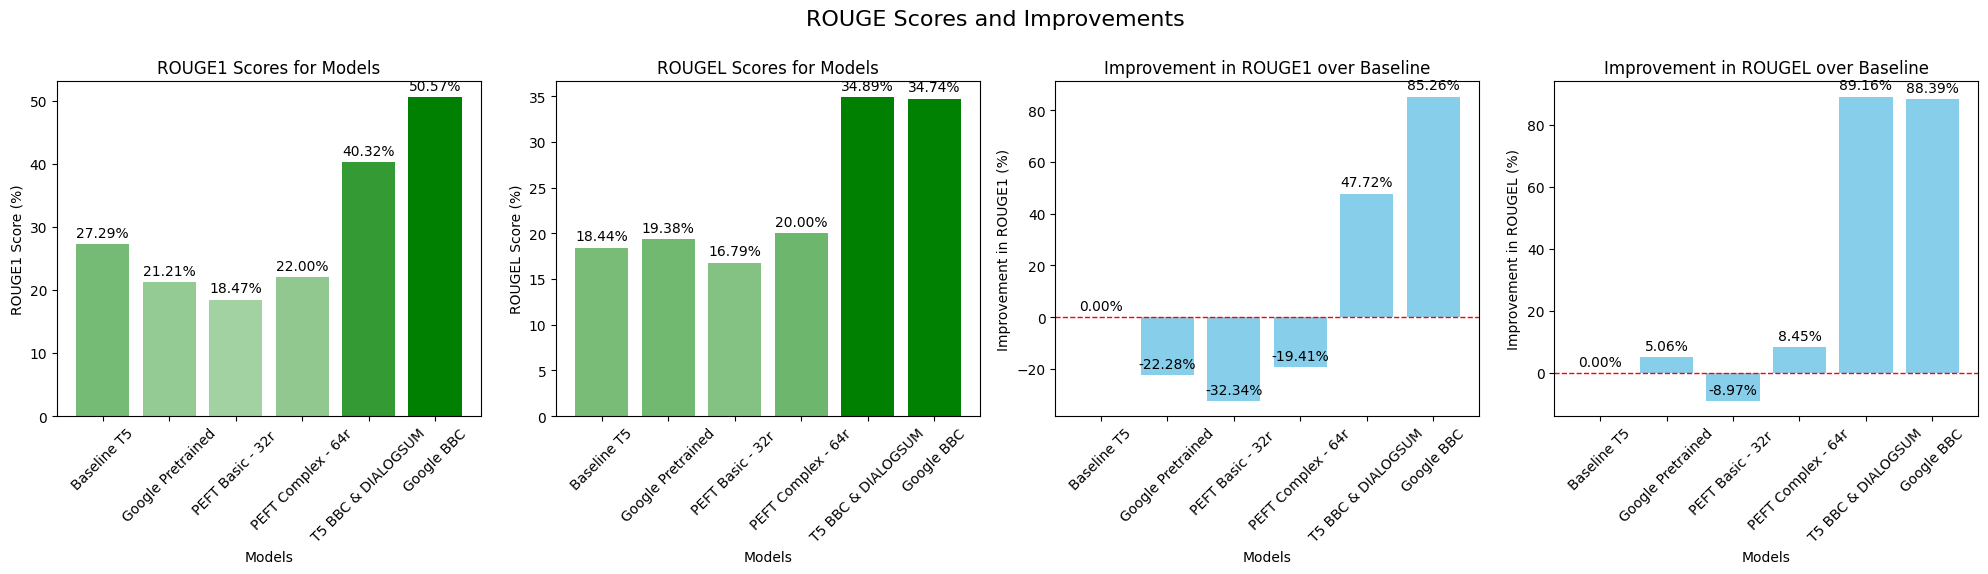

In [141]:
original_model_results, google_model_results, peft_basic_results, peft_complex_results, \
t5_2_model_results, google_1_model_results = compute_rouge_scores_for_models(summary_df_1)
rouge_scores = [original_model_results, google_model_results, peft_basic_results, peft_complex_results, t5_2_model_results, google_1_model_results]
model_names = ["Baseline T5", "Google Pretrained", "PEFT Basic - 32r ", "PEFT Complex - 64r", "T5 BBC & DIALOGSUM", "Google BBC"]
baseline_scores = original_model_results  # or google_model_results, depending on the group
prompt_text = "Summarize the following news."
plot_rouge_accuracies_and_improvements(model_names, rouge_scores, baseline_scores)


### INSTRUCTION PROMPT:


In [ ]:
prompt_template = "Summarise the key points of this conversation. Ensure you highlight the most important concepts:\n\n{input}\n\nSummary: "
inputs = dataset_bbc[45:55]['Articles']
human_baseline_summaries = dataset_bbc[45:55]['Summaries']
summary_df_2 = summarize_conversations(t5_original_model, t5_original_tokenizer, 
                                     google_t5_original_model, google_t5_original_tokenizer,
                                     peft_basic_model, peft_complex_model,
                                     t5_2_model, t5_2_tokenizer,
                                     google_1_model, google_1_tokenizer,
                                     inputs, human_baseline_summaries, prompt_template)


In [105]:
summary_df_2

,human_baseline_summaries,t5_original_summaries,google_original_summaries,peft_basic_summaries,peft_complex_summaries,t5_2_model_summaries,google_1_model_summaries
0,"G Thomas (capt); H Luscombe, T Shanklin, G Hen...","Tries from Jonathan Thomas, Tom Franklin and M...",The Wales team secured their first away win in...,The Wales team won their first away win at the...,The Wales team secured their first away win of...,"Jonathan Thomas, Tom Franklin and Martyn Willi...",Fly-half Stephen Jones added four conversions ...
1,"""We do not underestimate the scale of the chal...",High court challenge to government's aviation ...,UK airport operator BAA reiterates its support...,UK airport operator BAA reiterates support for...,UK airport operator BAA reiterates support for...,UK airport operator BAA has reiterated its sup...,UK airport operator BAA has reiterated its sup...
2,Symbian said that the spread of the Skulls pro...,Skulls is a program that creates new backgroun...,Those downloading the software could find all ...,A Nokia smartphone owner is warned to watch ou...,News : Nokia smartphones are being warned to w...,Symbian said the spread of the Skulls program ...,Symbian said that the spread of the Skulls pro...
3,Ipod owners can now download the Band Aid sing...,"72,000 copies of the new Band-Aid single were ...",The Band-Aid single is now on sale for 79p - t...,Apple has agreed to raise the cost of the sing...,The Band-Aid song is now sold for 79p and is o...,iTunes now sells Band-Aid song. Ipod owners ca...,Apple had been unwilling to raise the cost of ...
4,England forward Martin Corry says Jason Robins...,Martin Sorry backs skipper Jason Robinson to l...,Martin Sorry says Jason Robinson is the right ...,Martin Sorry says Jason Robinson is the right ...,Martin Sorry says Jason Robinson is the right ...,Sorry backs skipper Jason Robinson. Then he ex...,England forward Martin Sorry says Jason Robins...


ORIGINAL MODEL RESULTS:
rouge1: 27.61%
rouge2: 14.24%
rougeL: 18.99%
rougeLsum: 18.99%

GOOGLE MODEL RESULTS:
rouge1: 22.80%
rouge2: 17.11%
rougeL: 20.61%
rougeLsum: 20.61%

PEFT BASIC MODEL RESULTS:
rouge1: 24.71%
rouge2: 18.59%
rougeL: 19.86%
rougeLsum: 19.86%

PEFT COMPLEX MODEL RESULTS:
rouge1: 21.31%
rouge2: 15.33%
rougeL: 19.65%
rougeLsum: 19.65%

FINETUNED T5 BCN DIALOG SUM MODEL RESULTS:
rouge1: 41.10%
rouge2: 32.31%
rougeL: 33.19%
rougeLsum: 33.19%

FINETUNED T5 BCN GOOGLE MODEL RESULTS:
rouge1: 45.74%
rouge2: 35.14%
rougeL: 35.54%
rougeLsum: 35.54%



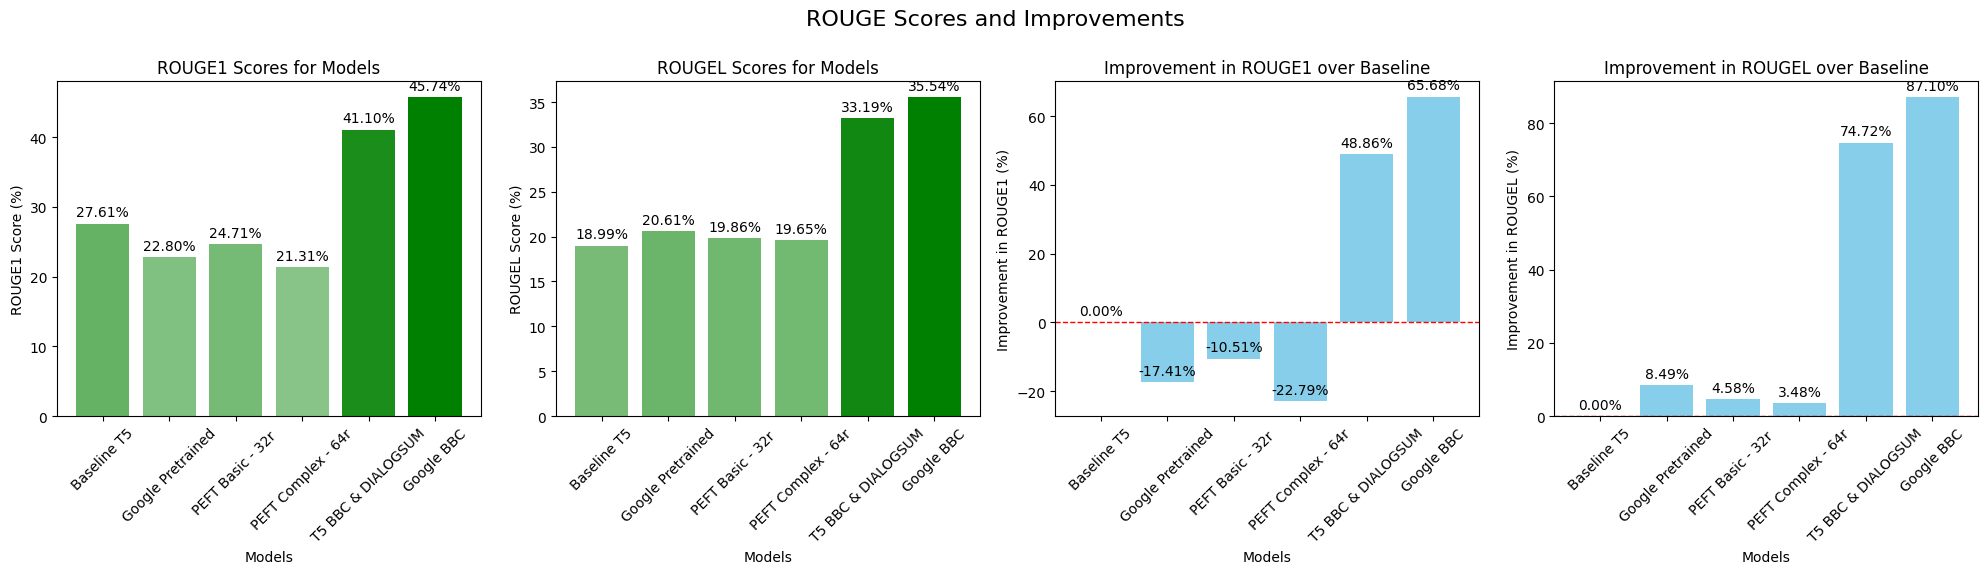

In [142]:

original_model_results, google_model_results, peft_basic_results, peft_complex_results, \
t5_2_model_results, google_1_model_results = compute_rouge_scores_for_models(summary_df_2)
rouge_scores = [original_model_results, google_model_results, peft_basic_results, peft_complex_results, t5_2_model_results, google_1_model_results]
model_names = ["Baseline T5", "Google Pretrained", "PEFT Basic - 32r ", "PEFT Complex - 64r", "T5 BBC & DIALOGSUM", "Google BBC"]
baseline_scores = original_model_results  # or google_model_results, depending on the group
prompt_text = "Summarise the key points of this conversation. Ensure you highlight the most important concepts:{input}\nSummary:"
plot_rouge_accuracies_and_improvements(model_names, rouge_scores, baseline_scores)


### CONTEXT PROMPT:


In [ ]:
prompt_template = "You are an educational expert. Your task is to generate multiple-choice questions based on the following text:\n\n{input}\n\nBefore generating questions, identify the main themes in the text.\n\nMain themes: "
inputs = dataset_bbc[45:55]['Articles']
human_baseline_summaries = dataset_bbc[45:55]['Summaries']
summary_df_3 = summarize_conversations(t5_original_model, t5_original_tokenizer, 
                                     google_t5_original_model, google_t5_original_tokenizer,
                                     peft_basic_model, peft_complex_model,
                                     t5_2_model, t5_2_tokenizer,
                                     google_1_model, google_1_tokenizer,
                                     inputs, human_baseline_summaries, prompt_template)


ORIGINAL MODEL RESULTS:
rouge1: 11.58%
rouge2: 3.29%
rougeL: 7.25%
rougeLsum: 7.25%

GOOGLE MODEL RESULTS:
rouge1: 11.34%
rouge2: 4.54%
rougeL: 8.18%
rougeLsum: 8.18%

PEFT BASIC MODEL RESULTS:
rouge1: 9.12%
rouge2: 1.77%
rougeL: 6.78%
rougeLsum: 6.70%

PEFT COMPLEX MODEL RESULTS:
rouge1: 13.25%
rouge2: 4.17%
rougeL: 10.93%
rougeLsum: 10.94%

FINETUNED T5 BCN DIALOG SUM MODEL RESULTS:
rouge1: 43.00%
rouge2: 32.53%
rougeL: 30.79%
rougeLsum: 30.79%

FINETUNED T5 BCN GOOGLE MODEL RESULTS:
rouge1: 30.71%
rouge2: 18.17%
rougeL: 25.57%
rougeLsum: 25.43%



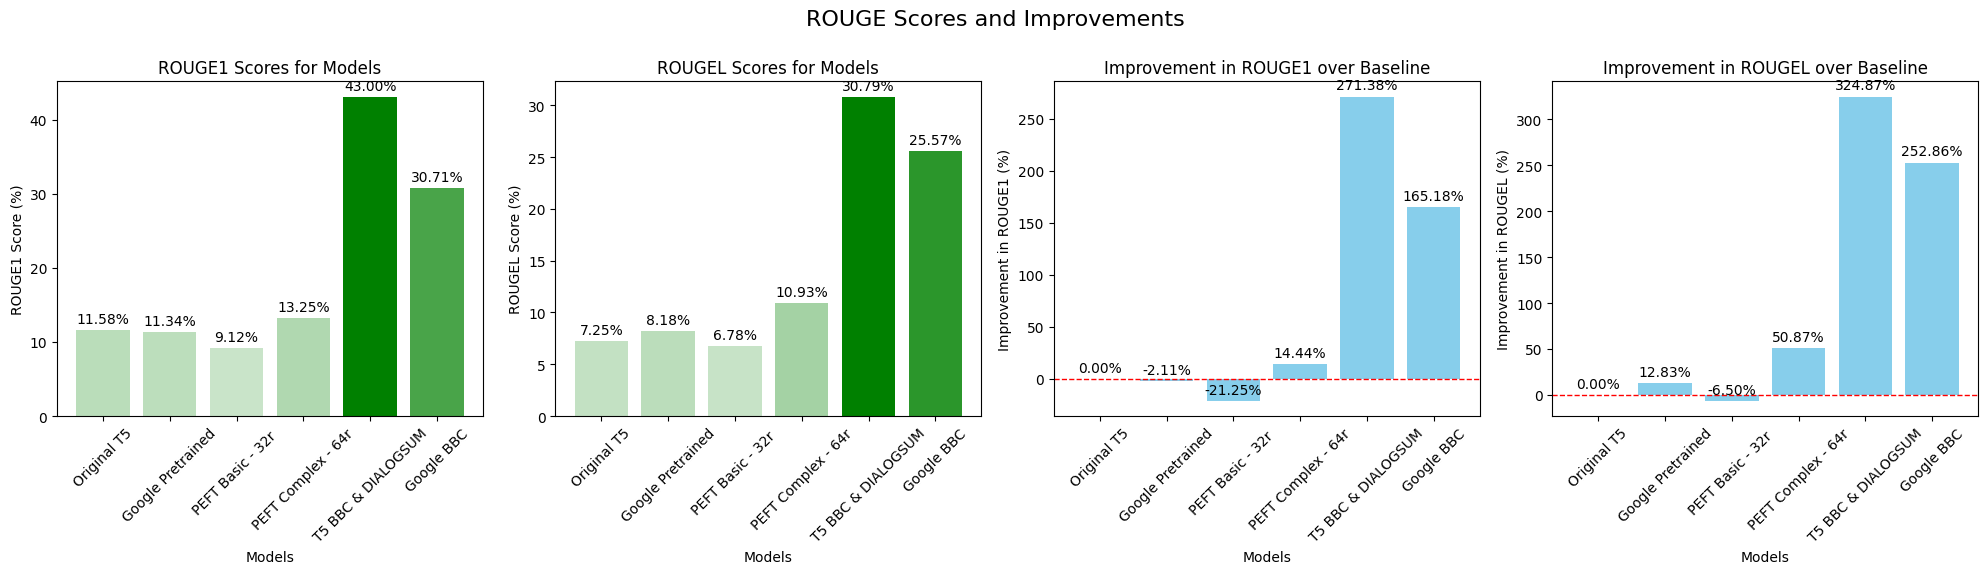

In [143]:

original_model_results, google_model_results, peft_basic_results, peft_complex_results, \
t5_2_model_results, google_1_model_results = compute_rouge_scores_for_models(summary_df_3)
model_names = ["Original T5", "Google Pretrained", "PEFT Basic - 32r ", "PEFT Complex - 64r", "T5 BBC & DIALOGSUM", "Google BBC"]
rouge_scores = [original_model_results, google_model_results, peft_basic_results, peft_complex_results, t5_2_model_results, google_1_model_results]
baseline_scores = original_model_results  # or google_model_results, depending on the group
prompt_text = "You are an educational expert. Your task is to generate multiple-choice questions based on the following text:{input}\nBefore generating questions, identify the main themes in the text.\nMain themes: "
plot_rouge_accuracies_and_improvements(model_names, rouge_scores, baseline_scores)


### ADVANCED COT (CHAIN OF THOUGHT) - BBC

In [155]:
prompt_template = "Step 1: Identify the main theme of this passage:\n\n{input}\n\nBefore generating questions, identify the main themes in the text.\n\nStep 2: Summarise the theme\n\nSummary: "
inputs = dataset_bbc[45:55]['Articles']
human_baseline_summaries = dataset_bbc[45:55]['Summaries']
summary_df_4 = summarize_conversations(t5_original_model, t5_original_tokenizer, 
                                     google_t5_original_model, google_t5_original_tokenizer,
                                     peft_basic_model, peft_complex_model,
                                     t5_2_model, t5_2_tokenizer,
                                     google_1_model, google_1_tokenizer,
                                     inputs, human_baseline_summaries, prompt_template)





ORIGINAL MODEL RESULTS:
rouge1: 8.04%
rouge2: 4.71%
rougeL: 6.51%
rougeLsum: 6.51%

GOOGLE MODEL RESULTS:
rouge1: 15.66%
rouge2: 11.91%
rougeL: 13.96%
rougeLsum: 13.96%

PEFT BASIC MODEL RESULTS:
rouge1: 14.64%
rouge2: 12.34%
rougeL: 14.37%
rougeLsum: 14.37%

PEFT COMPLEX MODEL RESULTS:
rouge1: 14.22%
rouge2: 11.73%
rougeL: 13.94%
rougeLsum: 13.95%

FINETUNED T5 BCN DIALOG SUM MODEL RESULTS:
rouge1: 31.45%
rouge2: 22.68%
rougeL: 21.32%
rougeLsum: 21.36%

FINETUNED T5 BCN GOOGLE MODEL RESULTS:
rouge1: 44.37%
rouge2: 37.13%
rougeL: 37.77%
rougeLsum: 37.77%



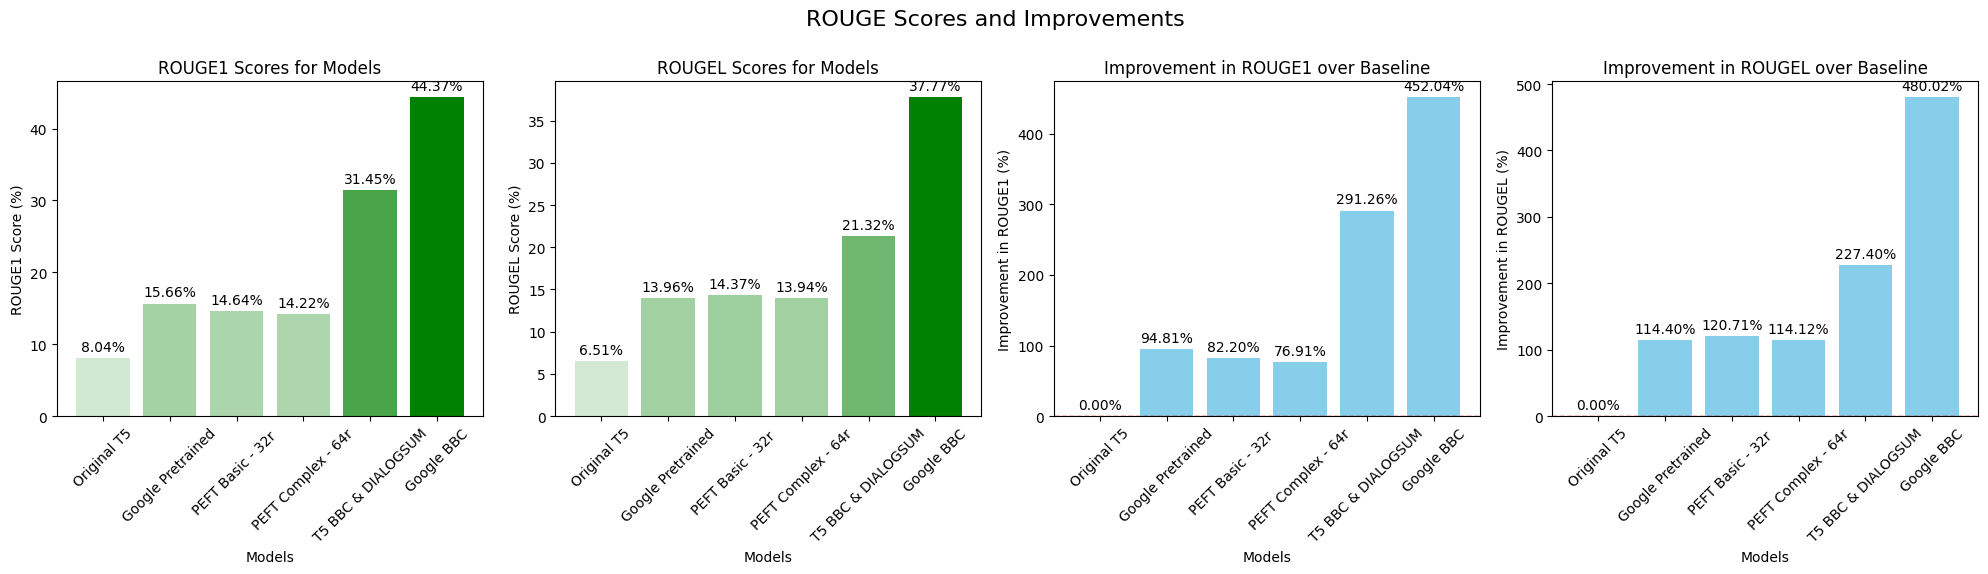

In [156]:
original_model_results, google_model_results, peft_basic_results, peft_complex_results, \
t5_2_model_results, google_1_model_results = compute_rouge_scores_for_models(summary_df_4)
model_names = ["Original T5", "Google Pretrained", "PEFT Basic - 32r ", "PEFT Complex - 64r", "T5 BBC & DIALOGSUM", "Google BBC"]
rouge_scores = [original_model_results, google_model_results, peft_basic_results, peft_complex_results, t5_2_model_results, google_1_model_results]
baseline_scores = original_model_results  # or google_model_results, depending on the group
prompt_text = "Step 1: Identify the main theme of this passage:{input}. Before generating questions, identify the main themes in the text.\nStep 2: Summarise the theme\nSummary: "
plot_rouge_accuracies_and_improvements(model_names, rouge_scores, baseline_scores)



## INFERENCE ON THE DIALOGSUM DATASET: Observing performance of T5 model which was tuned sequentially on 2 different dataset (BBC-DialogSum), and observing performance of other models on different dataset (they trained on BBC)

### BASIC PROMPT:

In [ ]:
prompt_template = "Summarize the following conversation:\n\n{input}\n\nSummary: "
inputs = dataset_dialog['test'][20:30]['dialogue']
human_baseline_summaries = dataset_dialog['test'][20:30]['summary']
summary_df_9 = summarize_conversations(t5_original_model, t5_original_tokenizer, 
                                     google_t5_original_model, google_t5_original_tokenizer,
                                     peft_basic_model, peft_complex_model,
                                     t5_2_model, t5_2_tokenizer,
                                     google_1_model, google_1_tokenizer,
                                     inputs, human_baseline_summaries, prompt_template)




ORIGINAL MODEL RESULTS:
rouge1: 0.00%
rouge2: 0.00%
rougeL: 0.00%
rougeLsum: 0.00%

GOOGLE MODEL RESULTS:
rouge1: 36.72%
rouge2: 11.14%
rougeL: 23.85%
rougeLsum: 23.90%

PEFT BASIC MODEL RESULTS:
rouge1: 37.78%
rouge2: 11.43%
rougeL: 27.07%
rougeLsum: 27.07%

PEFT COMPLEX MODEL RESULTS:
rouge1: 33.71%
rouge2: 6.73%
rougeL: 22.83%
rougeLsum: 22.83%

FINETUNED T5 BCN DIALOG SUM MODEL RESULTS:
rouge1: 47.87%
rouge2: 22.84%
rougeL: 38.16%
rougeLsum: 38.16%

FINETUNED T5 BCN GOOGLE MODEL RESULTS:
rouge1: 25.78%
rouge2: 6.20%
rougeL: 18.39%
rougeLsum: 18.39%



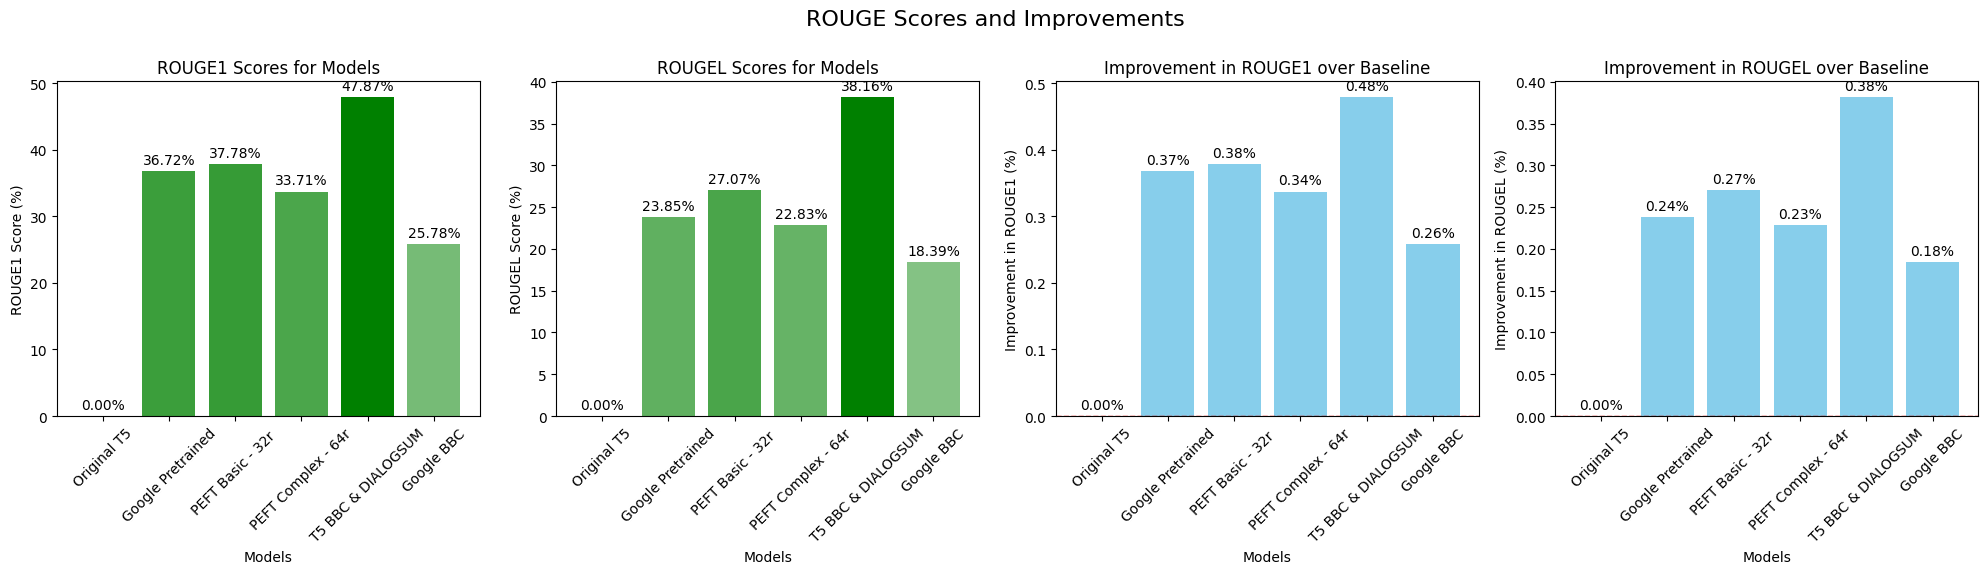

In [158]:

original_model_results, google_model_results, peft_basic_results, peft_complex_results, \
t5_2_model_results, google_1_model_results = compute_rouge_scores_for_models(summary_df_9)
model_names = ["Original T5", "Google Pretrained", "PEFT Basic - 32r ", "PEFT Complex - 64r", "T5 BBC & DIALOGSUM", "Google BBC"]
rouge_scores = [original_model_results, google_model_results, peft_basic_results, peft_complex_results, t5_2_model_results, google_1_model_results]
baseline_scores = original_model_results  # or google_model_results, depending on the group
prompt_text = "Summarize the following news."

plot_rouge_accuracies_and_improvements(model_names, rouge_scores, baseline_scores)



### INSTRUCTION PROMPT:


In [153]:
prompt_template = "Summarise the key points of this conversation. Ensure you highlight the most important concepts:\n\n{input}\n\nSummary: "
inputs = dataset_dialog['test'][100:110]['dialogue']
human_baseline_summaries = dataset_dialog['test'][100:110]['summary']
summary_df_6 = summarize_conversations(t5_original_model, t5_original_tokenizer, 
                                     google_t5_original_model, google_t5_original_tokenizer,
                                     peft_basic_model, peft_complex_model,
                                     t5_2_model, t5_2_tokenizer,
                                     google_1_model, google_1_tokenizer,
                                     inputs, human_baseline_summaries, prompt_template)



ORIGINAL MODEL RESULTS:
rouge1: 0.00%
rouge2: 0.00%
rougeL: 0.00%
rougeLsum: 0.00%

GOOGLE MODEL RESULTS:
rouge1: 27.39%
rouge2: 4.23%
rougeL: 22.85%
rougeLsum: 22.85%

PEFT BASIC MODEL RESULTS:
rouge1: 21.20%
rouge2: 0.87%
rougeL: 14.38%
rougeLsum: 14.38%

PEFT COMPLEX MODEL RESULTS:
rouge1: 31.60%
rouge2: 5.60%
rougeL: 25.34%
rougeLsum: 25.34%

FINETUNED T5 BCN DIALOG SUM MODEL RESULTS:
rouge1: 27.64%
rouge2: 6.81%
rougeL: 21.56%
rougeLsum: 21.48%

FINETUNED T5 BCN GOOGLE MODEL RESULTS:
rouge1: 20.04%
rouge2: 1.95%
rougeL: 16.49%
rougeLsum: 16.49%



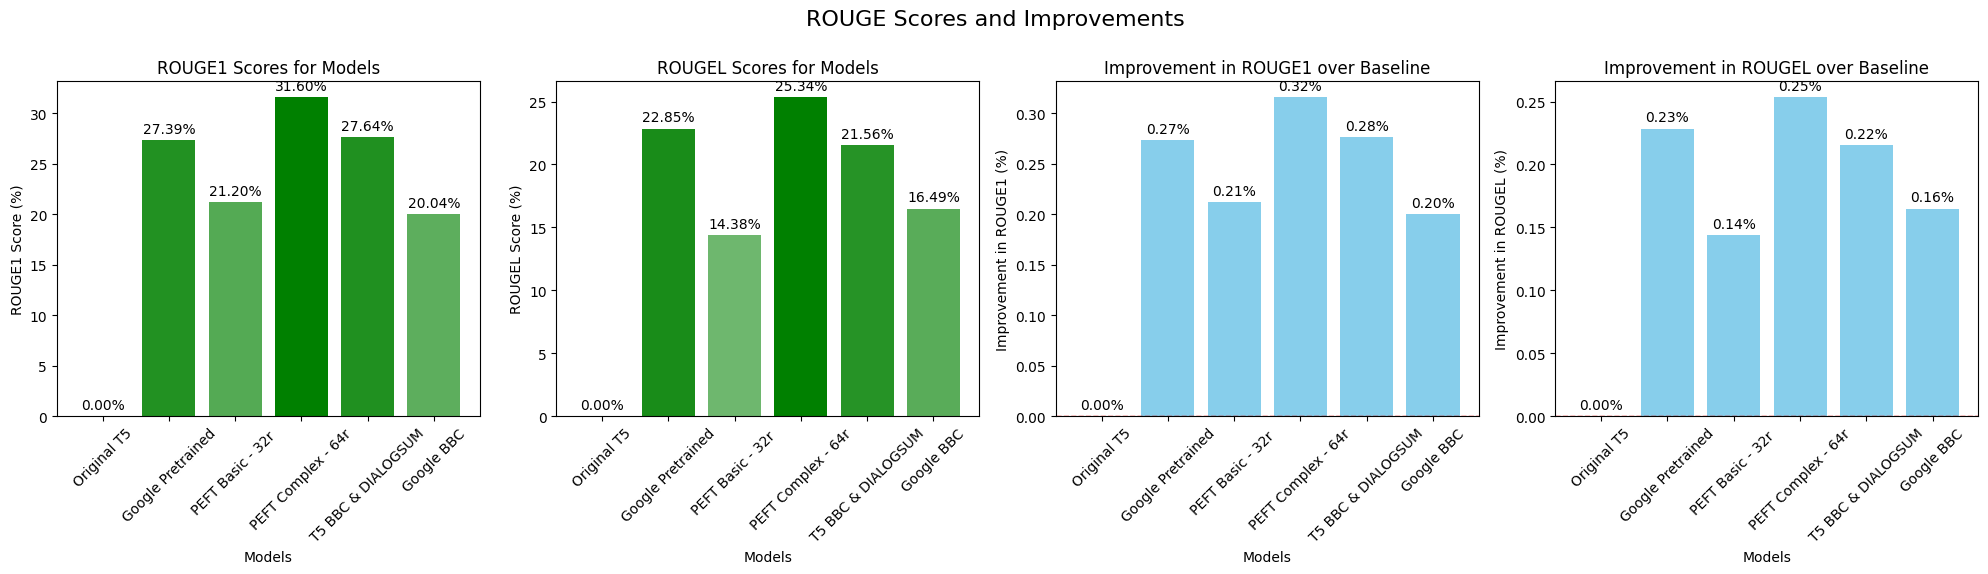

In [154]:
original_model_results, google_model_results, peft_basic_results, peft_complex_results, \
t5_2_model_results, google_1_model_results = compute_rouge_scores_for_models(summary_df_6)
model_names = ["Original T5", "Google Pretrained", "PEFT Basic - 32r ", "PEFT Complex - 64r", "T5 BBC & DIALOGSUM", "Google BBC"]
rouge_scores = [original_model_results, google_model_results, peft_basic_results, peft_complex_results, t5_2_model_results, google_1_model_results]
baseline_scores = original_model_results  # or google_model_results, depending on the group
prompt_text = "Summarise the key points of this conversation. Ensure you highlight the most important concepts:{input}\nSummary:"
plot_rouge_accuracies_and_improvements(model_names, rouge_scores, baseline_scores)



### CONTEXT PROMPT:

In [ ]:

prompt_template = "You are an educational expert. Your task is to generate multiple-choice questions based on the following dialogue between people:\n\n{input}\n\nBefore generating questions, identify the main themes in the dialogue.\n\nMain themes: "
inputs = dataset_dialog['test'][20:30]['dialogue']
human_baseline_summaries = dataset_dialog['test'][20:30]['summary']
summary_df_7 = summarize_conversations(t5_original_model, t5_original_tokenizer, 
                                     google_t5_original_model, google_t5_original_tokenizer,
                                     peft_basic_model, peft_complex_model,
                                     t5_2_model, t5_2_tokenizer,
                                     google_1_model, google_1_tokenizer,
                                     inputs, human_baseline_summaries, prompt_template)


ORIGINAL MODEL RESULTS:
rouge1: 25.74%
rouge2: 7.31%
rougeL: 16.67%
rougeLsum: 16.54%

GOOGLE MODEL RESULTS:
rouge1: 11.06%
rouge2: 1.21%
rougeL: 10.83%
rougeLsum: 11.04%

PEFT BASIC MODEL RESULTS:
rouge1: 11.78%
rouge2: 2.54%
rougeL: 11.78%
rougeLsum: 11.78%

PEFT COMPLEX MODEL RESULTS:
rouge1: 13.08%
rouge2: 1.67%
rougeL: 10.23%
rougeLsum: 10.23%

FINETUNED T5 BCN DIALOG SUM MODEL RESULTS:
rouge1: 44.91%
rouge2: 19.59%
rougeL: 35.05%
rougeLsum: 35.05%

FINETUNED T5 BCN GOOGLE MODEL RESULTS:
rouge1: 12.80%
rouge2: 1.08%
rougeL: 9.28%
rougeLsum: 9.33%



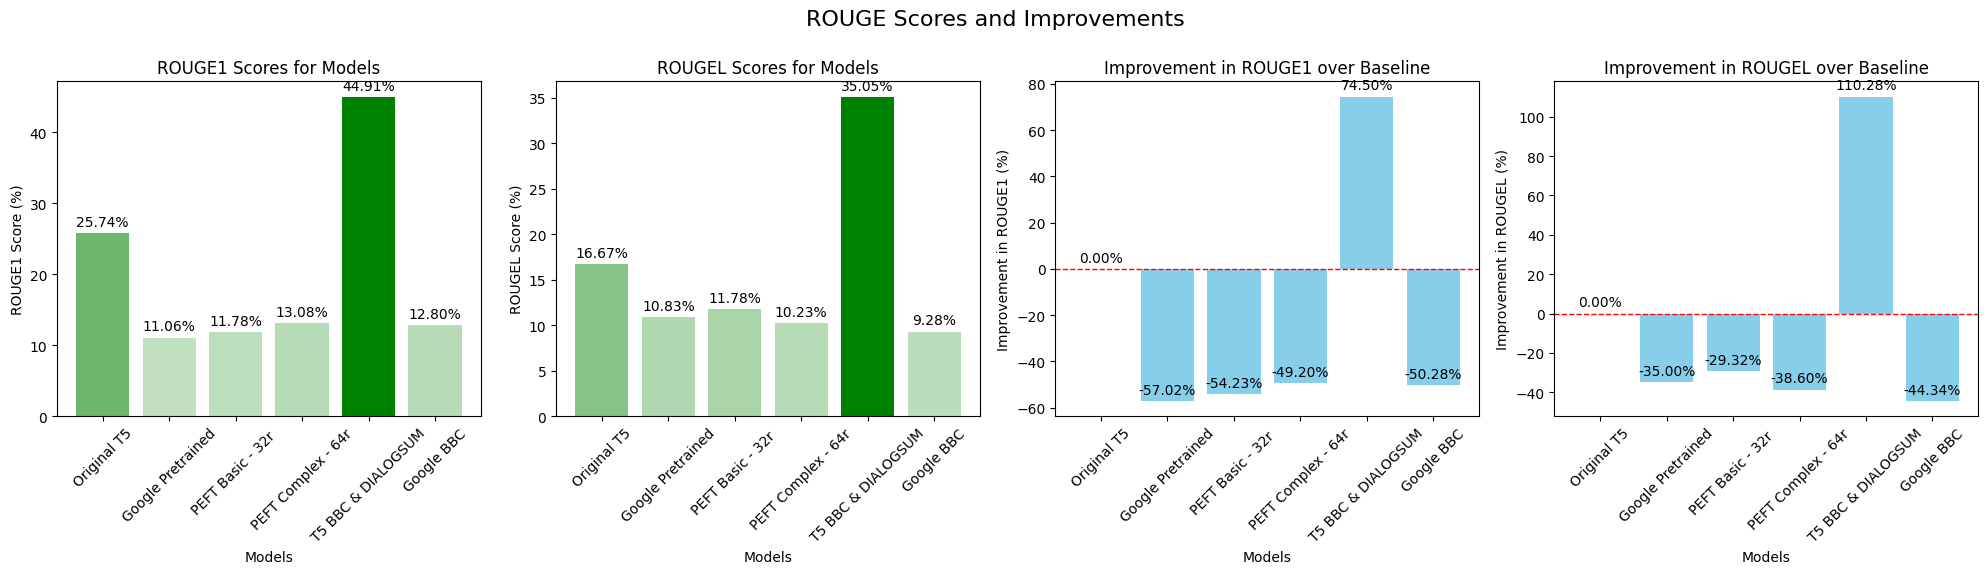

In [152]:

original_model_results, google_model_results, peft_basic_results, peft_complex_results, \
t5_2_model_results, google_1_model_results = compute_rouge_scores_for_models(summary_df_7)
model_names = ["Original T5", "Google Pretrained", "PEFT Basic - 32r ", "PEFT Complex - 64r", "T5 BBC & DIALOGSUM", "Google BBC"]
rouge_scores = [original_model_results, google_model_results, peft_basic_results, peft_complex_results, t5_2_model_results, google_1_model_results]
baseline_scores = original_model_results  # or google_model_results, depending on the group
prompt_text = "You are an educational expert. Your task is to generate multiple-choice questions based on the following text:{input}\nBefore generating questions, identify the main themes in the text.\nMain themes: "
plot_rouge_accuracies_and_improvements(model_names, rouge_scores, baseline_scores)



### ADVANCED COT(Chain of Thought):

In [ ]:
prompt_template = "Step 1: Identify the main theme of this passage:\n\n{input}\n\nBefore generating questions, identify the main themes in the text.\n\nStep 2: Summarise the theme\n\nSummary: "
inputs = dataset_dialog['test'][20:30]['dialogue']
human_baseline_summaries = dataset_dialog['test'][20:30]['summary']
summary_df_8 = summarize_conversations(t5_original_model, t5_original_tokenizer, 
                                     google_t5_original_model, google_t5_original_tokenizer,
                                     peft_basic_model, peft_complex_model,
                                     t5_2_model, t5_2_tokenizer,
                                     google_1_model, google_1_tokenizer,
                                     inputs, human_baseline_summaries, prompt_template)



ORIGINAL MODEL RESULTS:
rouge1: 0.00%
rouge2: 0.00%
rougeL: 0.00%
rougeLsum: 0.00%

GOOGLE MODEL RESULTS:
rouge1: 37.19%
rouge2: 8.11%
rougeL: 23.42%
rougeLsum: 23.44%

PEFT BASIC MODEL RESULTS:
rouge1: 36.89%
rouge2: 8.43%
rougeL: 27.54%
rougeLsum: 27.54%

PEFT COMPLEX MODEL RESULTS:
rouge1: 33.03%
rouge2: 7.98%
rougeL: 24.11%
rougeLsum: 24.11%

FINETUNED T5 BCN DIALOG SUM MODEL RESULTS:
rouge1: 46.77%
rouge2: 16.14%
rougeL: 34.71%
rougeLsum: 34.71%

FINETUNED T5 BCN GOOGLE MODEL RESULTS:
rouge1: 19.36%
rouge2: 2.65%
rougeL: 14.29%
rougeLsum: 14.29%



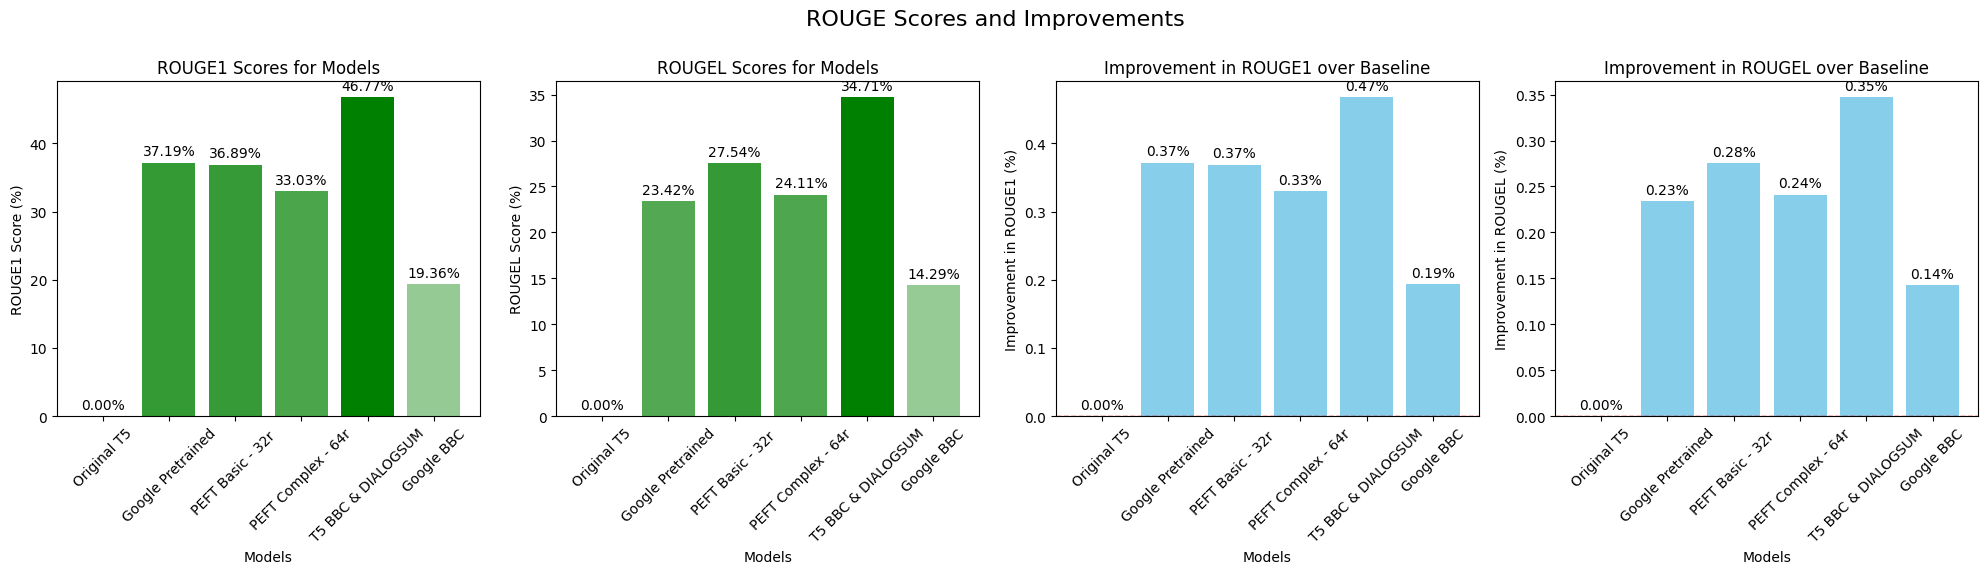

In [157]:
original_model_results, google_model_results, peft_basic_results, peft_complex_results, \
t5_2_model_results, google_1_model_results = compute_rouge_scores_for_models(summary_df_8)
model_names = ["Original T5", "Google Pretrained", "PEFT Basic - 32r ", "PEFT Complex - 64r", "T5 BBC & DIALOGSUM", "Google BBC"]
rouge_scores = [original_model_results, google_model_results, peft_basic_results, peft_complex_results, t5_2_model_results, google_1_model_results]
baseline_scores = original_model_results  # or google_model_results, depending on the group
prompt_text = "Step 1: Identify the main theme of this passage:{input}. Before generating questions, identify the main themes in the text.\nStep 2: Summarise the theme\nSummary: "
plot_rouge_accuracies_and_improvements(model_names, rouge_scores, baseline_scores)



## Comparative Analysis of T5 Models' Zero-shot Learning Performance on CNN Article Summarization (Different Dataset, Same Task): Data Content Relevance Effect.

### CONTEXT PROMT:

In [ ]:
prompt_template = "You are an educational expert. Your task is to generate multiple-choice questions based on the following conversation:\n\n{input}\n\nBefore generating questions, identify the main themes in the conversation.\n\nMain themes: "
inputs = dataset_cnn['test'][20:30]['article']
human_baseline_summaries = dataset_cnn['test'][20:30]['highlights']
summary_df_12 = summarize_conversations(t5_original_model, t5_original_tokenizer, 
                                     google_t5_original_model, google_t5_original_tokenizer,
                                     peft_basic_model, peft_complex_model,
                                     t5_2_model, t5_2_tokenizer,
                                     google_1_model, google_1_tokenizer,
                                     inputs, human_baseline_summaries, prompt_template)




ORIGINAL MODEL RESULTS:
rouge1: 30.67%
rouge2: 9.86%
rougeL: 18.68%
rougeLsum: 24.98%

GOOGLE MODEL RESULTS:
rouge1: 13.24%
rouge2: 1.79%
rougeL: 10.59%
rougeLsum: 11.51%

PEFT BASIC MODEL RESULTS:
rouge1: 15.66%
rouge2: 2.79%
rougeL: 11.74%
rougeLsum: 13.14%

PEFT COMPLEX MODEL RESULTS:
rouge1: 14.47%
rouge2: 2.79%
rougeL: 11.87%
rougeLsum: 12.77%

FINETUNED T5 BCN DIALOG SUM MODEL RESULTS:
rouge1: 23.96%
rouge2: 10.24%
rougeL: 17.11%
rougeLsum: 21.36%

FINETUNED T5 BCN GOOGLE MODEL RESULTS:
rouge1: 22.06%
rouge2: 3.43%
rougeL: 13.84%
rougeLsum: 18.06%



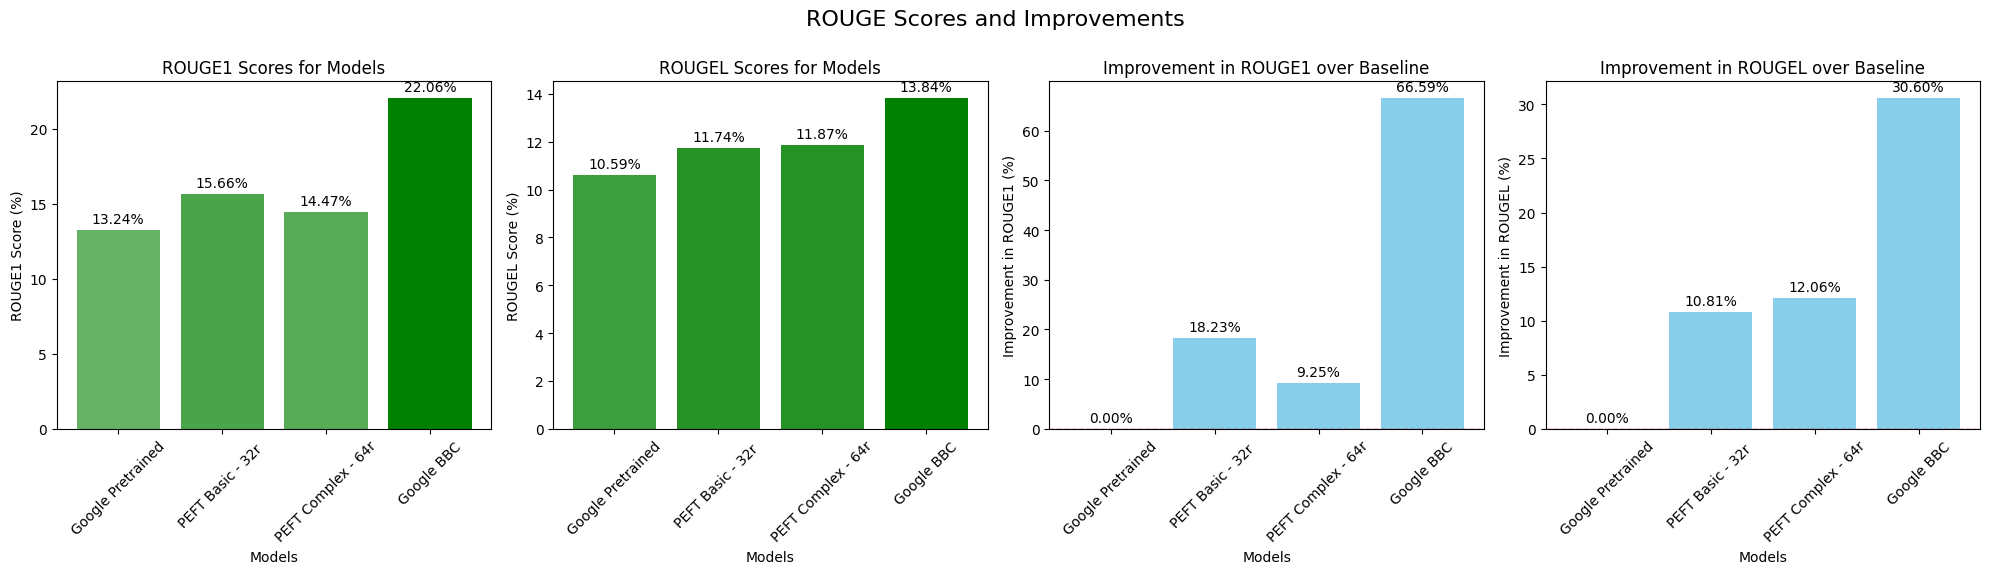

In [167]:
# Assuming you have computed the rouge scores already as shown in your code snippet
original_model_results, google_model_results, peft_basic_results, peft_complex_results, \
t5_2_model_results, google_1_model_results = compute_rouge_scores_for_models(summary_df_12)
model_names_google = ["Google Pretrained", "PEFT Basic - 32r ", "PEFT Complex - 64r", "Google BBC"]
rouge_scores_google = [google_model_results,peft_basic_results, peft_complex_results, google_1_model_results]
baseline_scores_google = google_model_results
prompt_text = "You are an educational expert. Your task is to generate multiple-choice questions based on the following text:{input}\nBefore generating questions, identify the main themes in the text.\nMain themes: "
plot_rouge_accuracies_and_improvements(model_names_google, rouge_scores_google, baseline_scores_google)


### ADVANCED COT 

In [ ]:
prompt_template = "Step 1: Identify the main theme of this passage:\n\n{input}\n\nBefore generating questions, identify the main themes in the text.\n\nStep 2: Summarise the theme\n\nSummary: "
inputs = dataset_cnn['test'][20:30]['article']
human_baseline_summaries = dataset_cnn['test'][20:30]['highlights']
summary_df_13 = summarize_conversations(t5_original_model, t5_original_tokenizer, 
                                     google_t5_original_model, google_t5_original_tokenizer,
                                     peft_basic_model, peft_complex_model,
                                     t5_2_model, t5_2_tokenizer,
                                     google_1_model, google_1_tokenizer,
                                     inputs, human_baseline_summaries, prompt_template)









ORIGINAL MODEL RESULTS:
rouge1: 19.86%
rouge2: 3.75%
rougeL: 12.94%
rougeLsum: 15.95%

GOOGLE MODEL RESULTS:
rouge1: 19.70%
rouge2: 3.56%
rougeL: 14.24%
rougeLsum: 15.32%

PEFT BASIC MODEL RESULTS:
rouge1: 23.40%
rouge2: 7.03%
rougeL: 18.44%
rougeLsum: 18.79%

PEFT COMPLEX MODEL RESULTS:
rouge1: 24.02%
rouge2: 10.63%
rougeL: 20.11%
rougeLsum: 20.41%

FINETUNED T5 BCN DIALOG SUM MODEL RESULTS:
rouge1: 27.07%
rouge2: 9.70%
rougeL: 18.31%
rougeLsum: 22.40%

FINETUNED T5 BCN GOOGLE MODEL RESULTS:
rouge1: 28.15%
rouge2: 8.34%
rougeL: 17.67%
rougeLsum: 20.82%



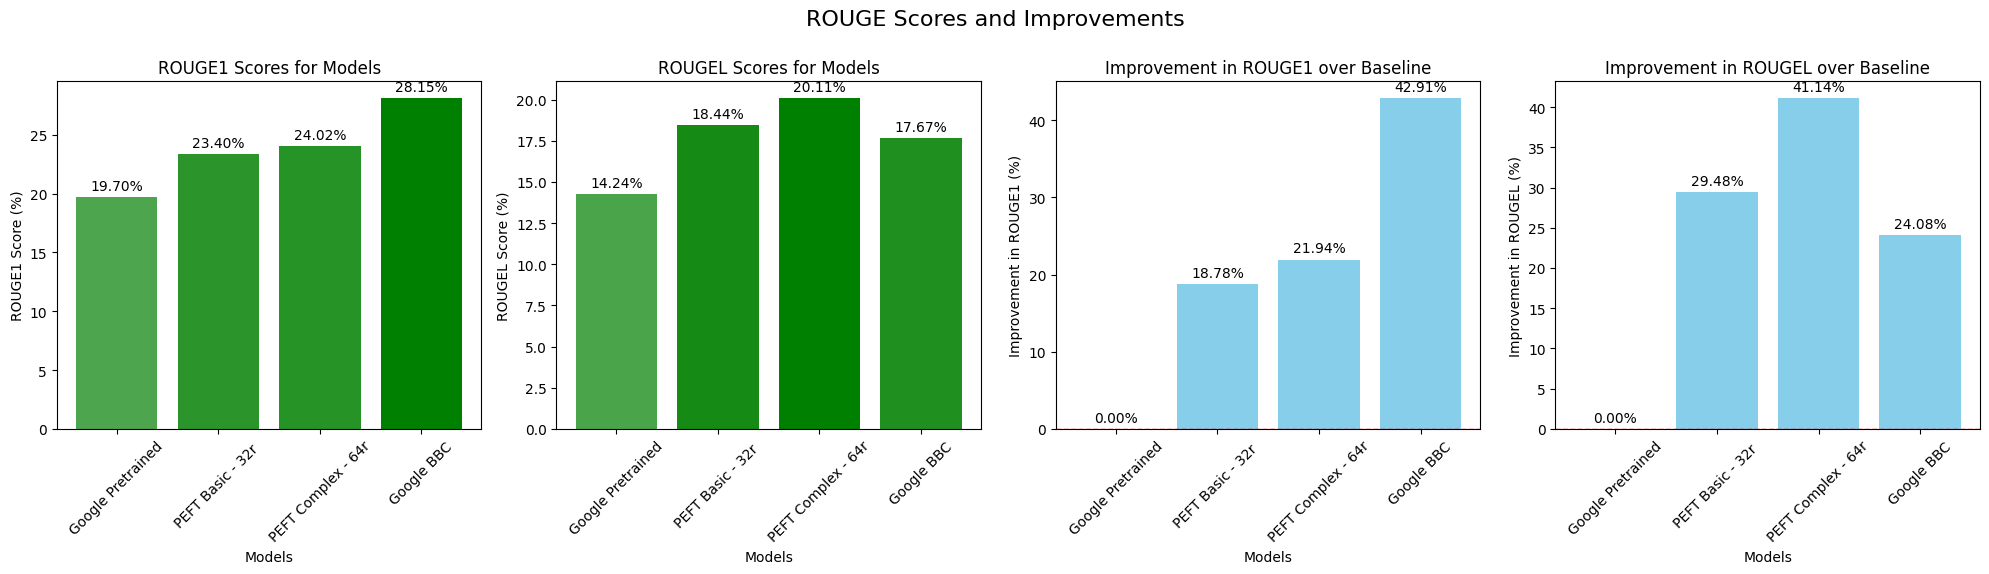

In [169]:
# Assuming you have computed the rouge scores already as shown in your code snippet
original_model_results, google_model_results, peft_basic_results, peft_complex_results, \
t5_2_model_results, google_1_model_results = compute_rouge_scores_for_models(summary_df_13)
model_names_google = ["Google Pretrained", "PEFT Basic - 32r ", "PEFT Complex - 64r", "Google BBC"]
rouge_scores_google = [google_model_results,peft_basic_results, peft_complex_results, google_1_model_results]
baseline_scores_google = google_model_results
prompt_text = "Step 1: Identify the main theme of this passage:{input}. Before generating questions, identify the main themes in the text.\nStep 2: Summarise the theme\nSummary: "
plot_rouge_accuracies_and_improvements(model_names_google, rouge_scores_google, baseline_scores_google)


## Comparative Analysis of T5 Models' Zero-shot Learning Performance on Different Datasets and Tasks: BBC Article Summarization (Same Dataset, Different Task) vs. ChatGBT Prompt Classification (Different Dataset, Different Task)

### BBC Dataset:

In [ ]:
prompt_template = "Classify the following conversation into  topics such as 'business', 'sports', 'tech','politics' or 'entertainment'.\n\nConversation:\n\n{input}\n\nClassification: "
inputs = dataset_bbc[45:55]['Articles']
human_baseline_summaries = dataset_bbc[45:55]['File_path']
summary_df_55 = summarize_conversations(t5_original_model, t5_original_tokenizer, 
                                     google_t5_original_model, google_t5_original_tokenizer,
                                     peft_basic_model, peft_complex_model,
                                     t5_2_model, t5_2_tokenizer,
                                     google_1_model, google_1_tokenizer,
                                     inputs, human_baseline_summaries, prompt_template)






ORIGINAL MODEL RESULTS:
rouge1: 0.00%
rouge2: 0.00%
rougeL: 0.00%
rougeLsum: 0.00%

GOOGLE MODEL RESULTS:
rouge1: 80.00%
rouge2: 0.00%
rougeL: 80.00%
rougeLsum: 80.00%

PEFT BASIC MODEL RESULTS:
rouge1: 82.22%
rouge2: 0.00%
rougeL: 82.22%
rougeLsum: 82.22%

PEFT COMPLEX MODEL RESULTS:
rouge1: 82.22%
rouge2: 0.00%
rougeL: 82.22%
rougeLsum: 82.22%

FINETUNED T5 BCN DIALOG SUM MODEL RESULTS:
rouge1: 0.00%
rouge2: 0.00%
rougeL: 0.00%
rougeLsum: 0.00%

FINETUNED T5 BCN GOOGLE MODEL RESULTS:
rouge1: 80.00%
rouge2: 0.00%
rougeL: 80.00%
rougeLsum: 80.00%



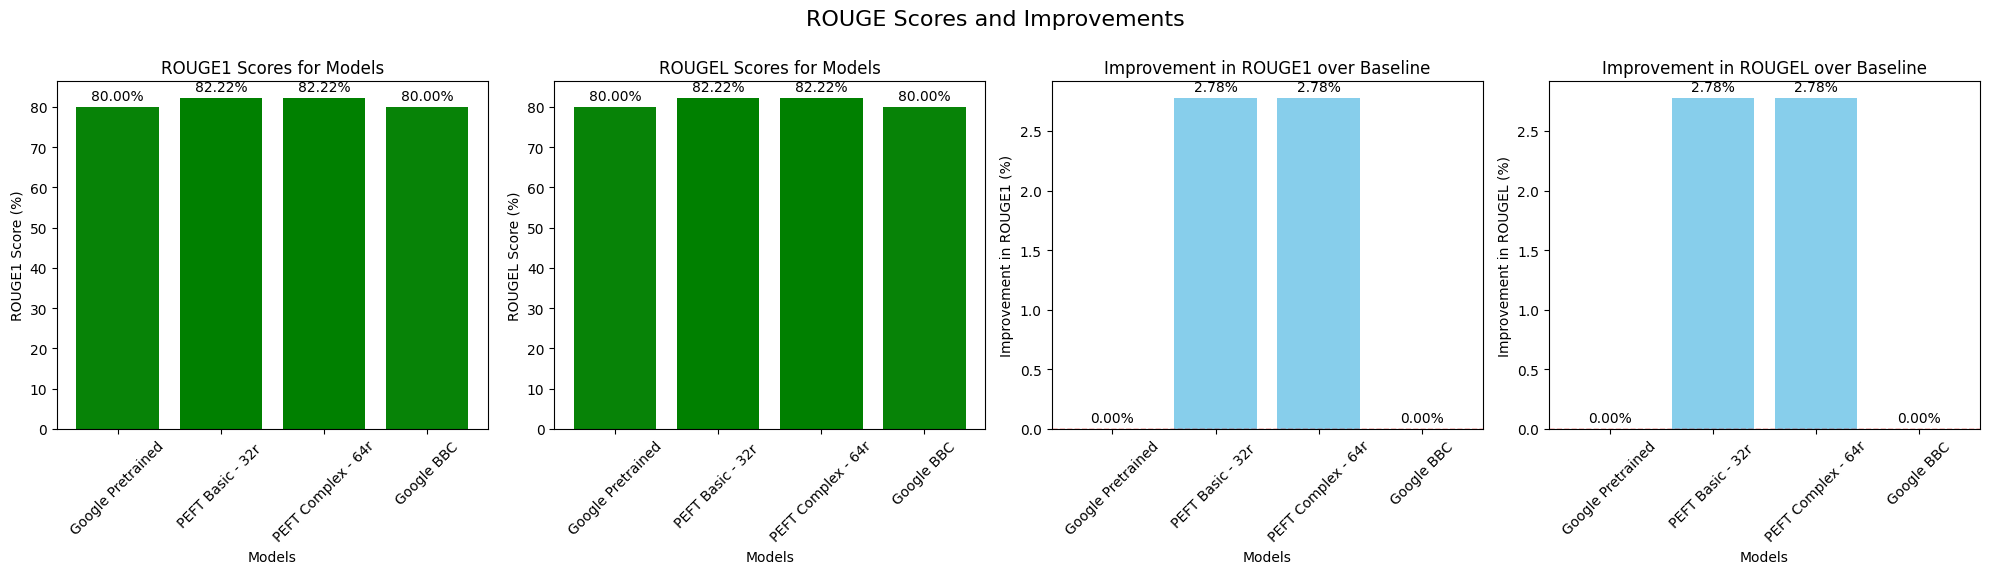

In [ ]:

# Assuming you have computed the rouge scores already as shown in your code snippet
original_model_results, google_model_results, peft_basic_results, peft_complex_results, \
t5_2_model_results, google_1_model_results = compute_rouge_scores_for_models(summary_df_55)
model_names_google = ["Google Pretrained", "PEFT Basic - 32r ", "PEFT Complex - 64r", "Google BBC"]
rouge_scores_google = [google_model_results,peft_basic_results, peft_complex_results, google_1_model_results]
baseline_scores_google = google_model_results
plot_rouge_accuracies_and_improvements(model_names_google, rouge_scores_google, baseline_scores_google)



### ChatGBT Prompt Dataset:

ORIGINAL MODEL RESULTS:
rouge1: 0.00%
rouge2: 0.00%
rougeL: 0.00%
rougeLsum: 0.00%

GOOGLE MODEL RESULTS:
rouge1: 78.89%
rouge2: 65.71%
rougeL: 78.89%
rougeLsum: 78.89%

PEFT BASIC MODEL RESULTS:
rouge1: 78.89%
rouge2: 65.71%
rougeL: 78.89%
rougeLsum: 78.89%

PEFT COMPLEX MODEL RESULTS:
rouge1: 82.22%
rouge2: 65.71%
rougeL: 82.22%
rougeLsum: 82.22%

FINETUNED T5 BCN DIALOG SUM MODEL RESULTS:
rouge1: 13.33%
rouge2: 6.21%
rougeL: 13.33%
rougeLsum: 13.33%

FINETUNED T5 BCN GOOGLE MODEL RESULTS:
rouge1: 73.33%
rouge2: 60.00%
rougeL: 73.33%
rougeLsum: 73.33%



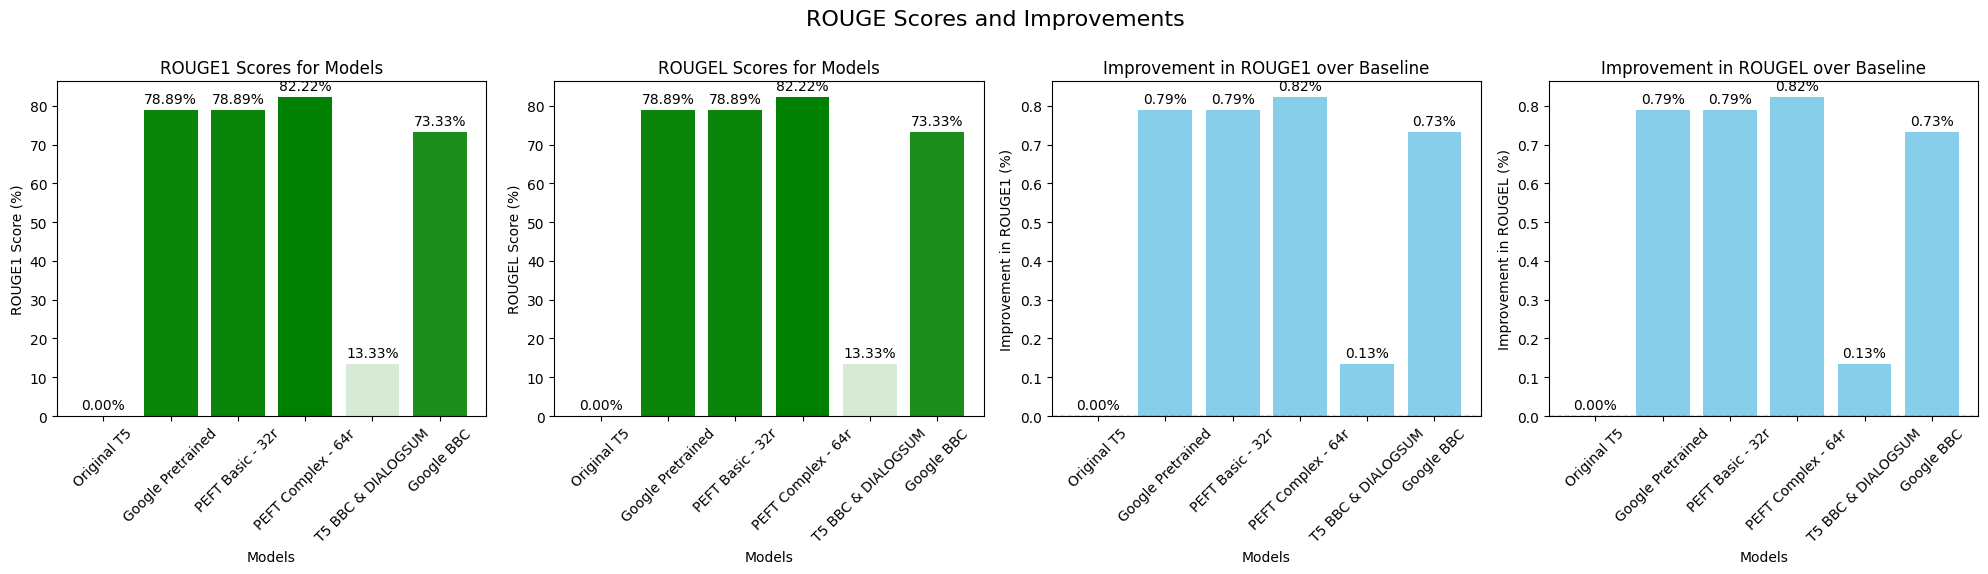

In [204]:
prompt_template = "Identify and classify the subject/topic from the following prompt:\n\nPrompt:\n{input}\n\nSubject/Topic:"

inputs = ds_text_extraction['train'][100:110]['prompt']
human_baseline_summaries = ds_text_extraction['train'][100:110]['act']
summary_df_5 = summarize_conversations(t5_original_model, t5_original_tokenizer, 
                                       google_t5_original_model, google_t5_original_tokenizer,
                                       peft_basic_model, peft_complex_model,
                                       t5_2_model, t5_2_tokenizer,
                                       google_1_model, google_1_tokenizer,
                                       inputs, human_baseline_summaries, prompt_template)


ORIGINAL MODEL RESULTS:
rouge1: 0.00%
rouge2: 0.00%
rougeL: 0.00%
rougeLsum: 0.00%

GOOGLE MODEL RESULTS:
rouge1: 78.89%
rouge2: 65.71%
rougeL: 78.89%
rougeLsum: 78.89%

PEFT BASIC MODEL RESULTS:
rouge1: 78.89%
rouge2: 65.71%
rougeL: 78.89%
rougeLsum: 78.89%

PEFT COMPLEX MODEL RESULTS:
rouge1: 82.22%
rouge2: 65.71%
rougeL: 82.22%
rougeLsum: 82.22%

FINETUNED T5 BCN DIALOG SUM MODEL RESULTS:
rouge1: 13.33%
rouge2: 6.21%
rougeL: 13.33%
rougeLsum: 13.33%

FINETUNED T5 BCN GOOGLE MODEL RESULTS:
rouge1: 73.33%
rouge2: 60.00%
rougeL: 73.33%
rougeLsum: 73.33%



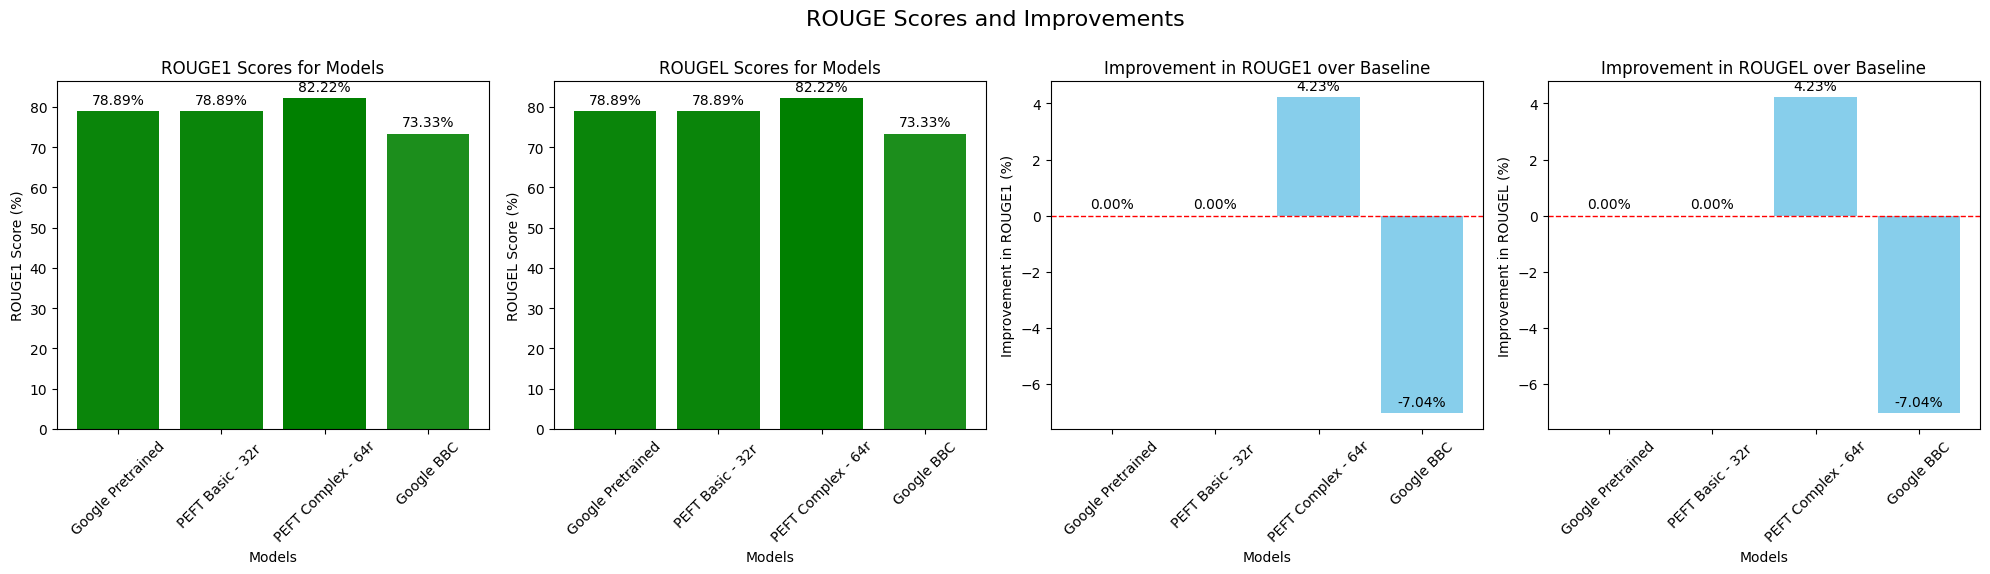

In [209]:


# Assuming you have computed the rouge scores already as shown in your code snippet
original_model_results, google_model_results, peft_basic_results, peft_complex_results, \
t5_2_model_results, google_1_model_results = compute_rouge_scores_for_models(summary_df_5)
model_names_google = ["Google Pretrained", "PEFT Basic - 32r ", "PEFT Complex - 64r", "Google BBC"]
rouge_scores_google = [google_model_results,peft_basic_results, peft_complex_results, google_1_model_results]
baseline_scores_google = google_model_results
plot_rouge_accuracies_and_improvements(model_names_google, rouge_scores_google, baseline_scores_google)




In [210]:
summary_df_5


,human_baseline_summaries,t5_original_summaries,google_original_summaries,peft_basic_summaries,peft_complex_summaries,t5_2_model_summaries,google_1_model_summaries
0,Synonym finder,True,Synonyms Provider,Synonyms Provider,Synonyms,Subject/Topic : Provide a max of 10 synonyms p...,Synonyms
1,Personal Shopper,True,Personal shopper,Personal shopper,Personal shopper,Prompt : `` I want you to act as my personal s...,Personal shopper
2,Food Critic,True,Food critic,Food critic,Food critic,Prompt : I want you to act as a food critic. I...,Food critic
3,Virtual Doctor,True,Your request is for a virtual doctor.,Your request is for a virtual doctor.,Your request is for a virtual doctor.,The virtual doctor asks for a diagnosis and tr...,My first request
4,Personal Chef,True,Personal Chef,Personal Chef,Personal Chef,Prompt : I want you to act as my personal chef...,Personal chef
